# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [2]:
# Import libraries and modules.

### YOUR CODE HERE ### 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

[Write your response here. Double-click (or enter) to edit.] The purpose of EDA is to better understand the shape and distrubution of hte data set, so as to have an idea as to what are the variables are and roughly how they are related. 

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

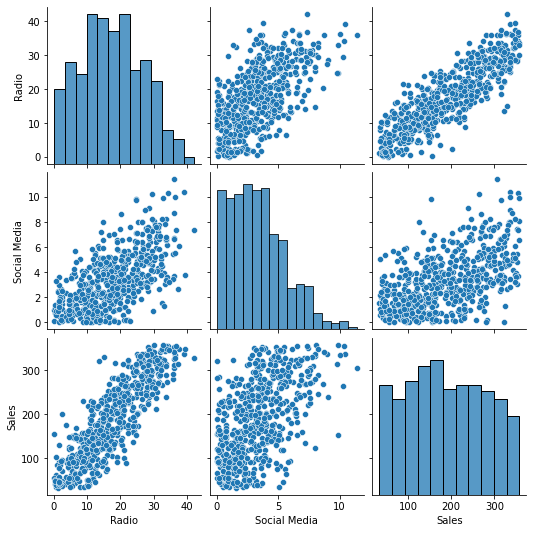

In [4]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data=data)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



[Write your response here. Double-click (or enter) to edit.] Sales has a strong linear relationship with Radio. There is also what appears to be a minor linear relationship to Social Media as well. TV and Social Media are not included since they are categorical variables. 

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [65]:
# Calculate the mean sales for each TV category. 
influ = ["Nano", "Micro", "Mega", "Macro"]
tv = ["Medium", "Low", "High"]
### YOUR CODE HERE ###
low = data[data["TV"] == "Low"]["Sales"].mean()
medium =  data[data["TV"] == "Medium"]["Sales"].mean()
high =  data[data["TV"] == "High"]["Sales"].mean()
# Calculate the mean sales for each Influencer category. 

### YOUR CODE HERE ### 

nano=0
micro=0
mega=0
macro=0
influ_avgs = [nano,micro,mega,macro]
count = 0
for x in influ:
    output = data[data["Influencer"] == x]["Sales"].mean()
    influ_avgs[count] = output
    count += 1
    print(f"Influencer {x}: {output}")

print(f"TV Low: {low}")
print(f"TV Medium: {medium}")
print(f"TV High: {high}")

#better way....
# print(data.groupby('TV')['Sales'].mean())


Influencer Nano: 191.87443179210186
Influencer Micro: 188.32184563927157
Influencer Mega: 194.48794067394152
Influencer Macro: 181.6700700719684
TV Low: 90.9841010823881
TV Medium: 195.35803193512206
TV High: 300.8531951210846


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



[Write your response here. Double-click (or enter) to edit.] They do seem to be linearly correlated; however, they might be over simplifying the data with having 100s of data rows having the same value for each

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [20]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data.dropna(inplace = True, axis = 0)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [27]:
data.head(1)

,TV,Radio,Social_media,Influencer,Sales
0,Low,3.51807,2.29379,Micro,55.261284


In [26]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 
data.rename(columns={"Social Media": "Social_media"}, inplace=True)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [36]:
# Define the OLS formula.
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
### YOUR CODE HERE ### 
formula = "Sales ~ C(TV) + Radio + Social_media"
x = data[["Radio","Social_media","TV"]]
y = data[["Sales"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create an OLS model.
### YOUR CODE HERE ### 
OLS = ols(formula = formula, data = ols_data)


# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
summary = model.summary()

# Display the model results.

### YOUR CODE HERE ### 
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     927.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          2.79e-199
Time:                        20:11:25   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3805.
Df Residuals:                     395   BIC:                             3824.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4472      7.811     

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



[Write your response here. Double-click (or enter) to edit.] I chose TV, Social Media, and Radio, Influencer all sub categorical variables had high P values. I kept Social media since it is does show exact values for each data point. While excluding TV, the r squared value was only a little more than 0.7, while including it brought a more fitted model. Hopefully not overfitted. 

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

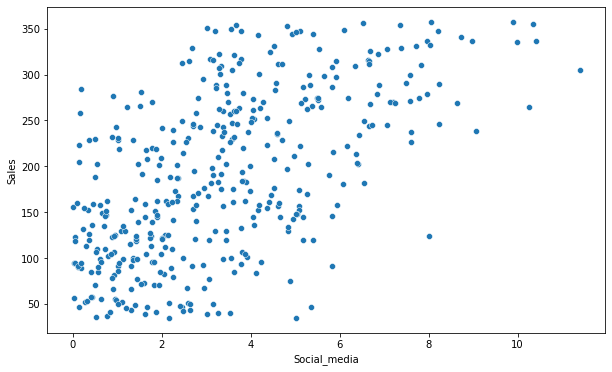

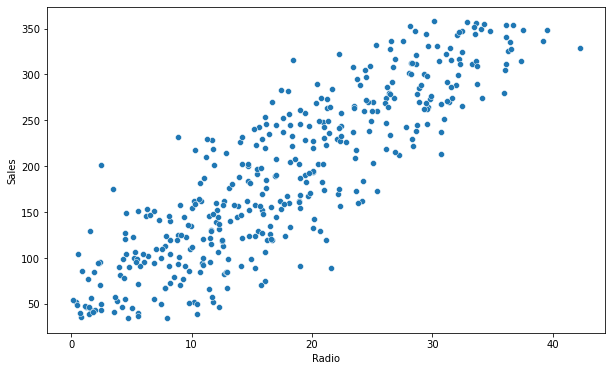

In [41]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.scatterplot(data = ols_data, x = "Social_media", y="Sales")
plt.figure(figsize=(10,6))
sns.scatterplot(data = ols_data, x = "Radio", y="Sales")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


[Write your response here. Double-click (or enter) to edit.] yes, although it is weak with the Social media variable

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

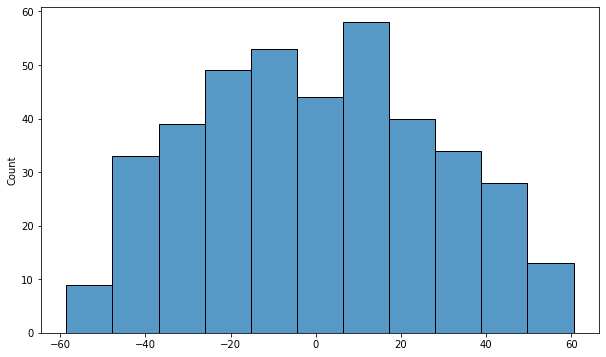

<Figure size 720x432 with 0 Axes>

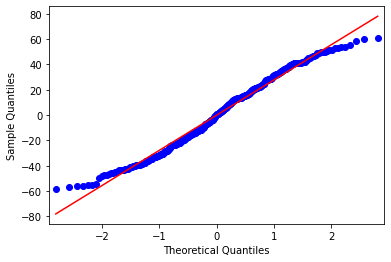

In [43]:
# Calculate the residuals.
import statsmodels.api as sm


### YOUR CODE HERE ### 
residuals = model.resid


# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
plt.figure(figsize=(10,6))
sns.histplot(data= residuals)

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 
plt.figure(figsize=(10,6))
sm.qqplot(residuals, line = 's')

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



[Write your response here. Double-click (or enter) to edit.] There is a normal distribution of the residuals. There is a somewhat close following of the line in the Q-Q plot; however, it is starting to show a wave different from linear. 

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

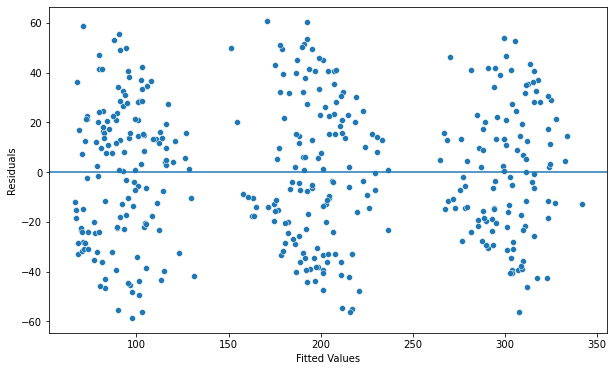

In [46]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 


# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fitted_values = model.predict(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




[Write your response here. Double-click (or enter) to edit.]

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

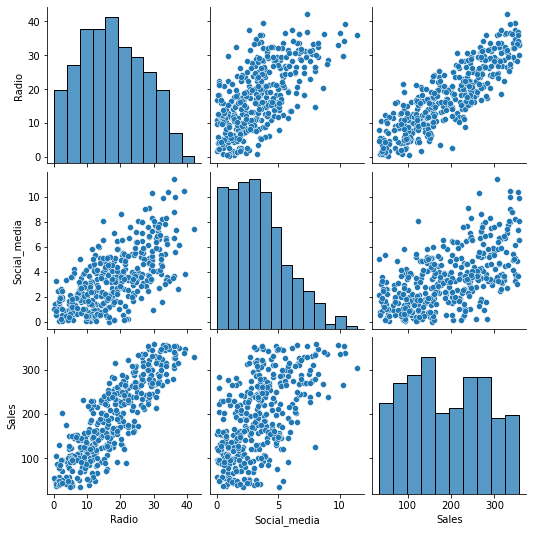

In [47]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(ols_data)


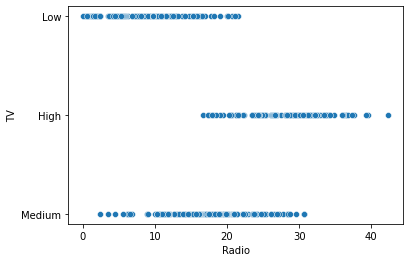

In [48]:
sns.scatterplot(data = ols_data, x = "Radio", y = "TV")

In [54]:
ols_data.head(1)

,Radio,Social_media,TV,Sales
149,12.637586,0.308468,Low,112.814794


In [61]:
# Calculate the var iance inflation factor (optional).

### YOUR CODE HERE ### 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# variance_inflation_factor(ols_data[["Sales","Radio","Social_media"]], exog_idx="Sales")
vif_data = pd.DataFrame()
vif_data["feature"] = ["Sales", "Radio", "Social_media"]
vif_data["VIF"] = [variance_inflation_factor(ols_data[["Sales", "Radio", "Social_media"]].values, i)
                   for i in range(ols_data[["Sales", "Radio", "Social_media"]].shape[1])]

In [62]:
print(vif_data)

        feature        VIF
0         Sales  18.115330
1         Radio  20.336664
2  Social_media   5.470170


In [67]:
#There way of calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,5.170922
Social_media,5.170922


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?



## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [63]:
# Display the model results summary.

### YOUR CODE HERE ### 
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     927.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          2.79e-199
Time:                        20:11:25   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3805.
Df Residuals:                     395   BIC:                             3824.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4472      7.811     

**Question:** What is your interpretation of the model's R-squared?


[Write your response here. Double-click (or enter) to edit.] 0.904

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [64]:
# Display the model results summary.

### YOUR CODE HERE ### 
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     927.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          2.79e-199
Time:                        20:11:25   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3805.
Df Residuals:                     395   BIC:                             3824.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4472      7.811     

**Question:** What are the model coefficients?



[Write your response here. Double-click (or enter) to edit.] intercept: 214.45, tv_low: -148.26, tv_med: -70.29, tv_high: , radio: 3.004, social media: 0.035

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



[Write your response here. Double-click (or enter) to edit.]

Sales=𝛽0+𝛽1∗𝑋1+𝛽2∗𝑋2+𝛽3∗𝑋3
 
Sales=𝛽0+𝛽𝑇𝑉𝐿𝑜𝑤∗𝑋𝑇𝑉𝐿𝑜𝑤+𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+𝛽𝑅𝑎𝑑𝑖𝑜∗𝑋𝑅𝑎𝑑𝑖𝑜
 
Sales=218.5261−154.2971∗𝑋𝑇𝑉𝐿𝑜𝑤−75.3120∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+2.9669∗𝑋𝑅𝑎𝑑𝑖𝑜

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



[Write your response here. Double-click (or enter) to edit.] all are significant except social media.

The default TV category for the model is High since there are coefficients for the other two TV categories, Medium and Low. Because the coefficients for the Medium and Low TV categories are negative, that means the average of sales is lower for Medium or Low TV categories compared to the High TV category when Radio is at the same level.

**Question:** Why is it important to interpret the beta coefficients?



[Write your response here. Double-click (or enter) to edit.] so we understand what increasing each value of independent variables will do to the dependent variable. 

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

**Question:** What are you interested in exploring based on your model?



[Write your response here. Double-click (or enter) to edit.] Why tv is showing a negative correlation on the model

Providing the business with the estimated sales given different TV promotions and radio budgets
Additional plots to help convey the results, such as using the seaborn regplot() to plot the data with a best fit regression line

**Question:** Do you think your model could be improved? Why or why not? How?

[Write your response here. Double-click (or enter) to edit.] I suspect there might may be some overfitting occuring

Given how accurate TV was as a predictor, the model could be improved by getting a more granular view of the TV promotions, such as by considering more categories or the actual TV promotional budgets.

Furthermore, additional variables, such as the location of the marketing campaign or the time of year, could increase model accuracy.

## Conclusion

**What are the key takeaways from this lab?**

[Write your response here. Double-click (or enter) to edit.] Radio advertisement is the biggest contributing factor to sales

Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

**What results can be presented from this lab?**

[Write your response here. Double-click (or enter) to edit.]

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a Low TV promotion is 154.2971 lower on average than a high TV promotion given the same Radio promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000
 , meaning all coefficients are statistically significant at  𝑝=0.05
 . The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a  95%
  chance the interval  [−163.979,−144.616]
  contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤
 , which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.



**How would you frame your findings to external stakeholders?**

[Write your response here. Double-click (or enter) to edit.] With a P value of 0.000 radio advertisement for every million invest will increase sales by 3 million, while The use of TV advertisment is reducing and taking away from sales.

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by  $75.3120
  million (95% CI  [−82.431,−68.193])
 , and switching from a high to low TV promotional budget reduces sales by  $154.297
  million (95% CI  [−163.979,−144.616])
 . The model also estimates that an increase of  $1
  million in the radio promotional budget will yield a  $2.9669
  million increase in sales (95% CI  [2.551,3.383]
 ).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales.


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.